## Installing Required Libraries

In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor
from warnings import filterwarnings
filterwarnings("ignore")

## KNN

In [77]:
sick = pd.read_csv(r"C:\Users\MONSTER\Desktop\Anemia_Dataset.csv")
df = df.copy()
df = df.dropna()
y = df["Anaemic_Yes"]
x = df.drop("Anaemic_Yes", axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [79]:
knn_model = KNeighborsRegressor().fit(x_train, y_train)

In [80]:
knn_model.n_neighbors

5

## Prediction

In [83]:
y_pred = knn_model.predict(x_test)

In [84]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.30127932350101755

In [85]:
RMSE = [] 

for k in range(10):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(x_train, y_train)
    y_pred = knn_model.predict(x_train) 
    rmse = np.sqrt(mean_squared_error(y_train,y_pred)) 
    RMSE.append(rmse) 
    print("k =" , k , "için RMSE değeri: ", rmse)


k = 1 için RMSE değeri:  0.0
k = 2 için RMSE değeri:  0.09805806756909202
k = 3 için RMSE değeri:  0.1307440900921227
k = 4 için RMSE değeri:  0.11671244523098157
k = 5 için RMSE değeri:  0.12194996872404221
k = 6 için RMSE değeri:  0.13476792334377333
k = 7 için RMSE değeri:  0.12736511832024697
k = 8 için RMSE değeri:  0.1320147136321729
k = 9 için RMSE değeri:  0.14009448265691452
k = 10 için RMSE değeri:  0.14849674087764367


## Model tuning

In [87]:
from sklearn.model_selection import GridSearchCV

In [88]:
knn_params = {"n_neighbors": np.arange(1,20)}

In [91]:
knn = KNeighborsRegressor()

In [94]:
knn_cv_model = GridSearchCV(knn, knn_params, cv = 10)

In [95]:
knn_cv_model.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

## Here we show the difference between a model improved by cross validation and before validation

In [127]:
RMSE = [] 
RMSE_CV = []
for k in range(10):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(x_train, y_train)
    y_pred = knn_model.predict(x_train) 
    rmse = np.sqrt(mean_squared_error(y_train,y_pred)) 
    rmse_cv = np.sqrt(-1*cross_val_score(knn_model, x_train, y_train, cv=10, 
                                         scoring = "neg_mean_squared_error").mean())
    RMSE.append(rmse) 
    RMSE_CV.append(rmse_cv)
    print("k =" , k , "için RMSE değeri: ", rmse, "RMSE_CV değeri: ", rmse_cv )

k = 1 için RMSE değeri:  0.0 RMSE_CV değeri:  0.19364916731037085
k = 2 için RMSE değeri:  0.09805806756909202 RMSE_CV değeri:  0.15811388300841897
k = 3 için RMSE değeri:  0.1307440900921227 RMSE_CV değeri:  0.1343709624716425
k = 4 için RMSE değeri:  0.11671244523098157 RMSE_CV değeri:  0.14252192813739226
k = 5 için RMSE değeri:  0.12194996872404221 RMSE_CV değeri:  0.14317821063276354
k = 6 için RMSE değeri:  0.13476792334377333 RMSE_CV değeri:  0.13962108586831581
k = 7 için RMSE değeri:  0.12736511832024697 RMSE_CV değeri:  0.15343491797005704
k = 8 için RMSE değeri:  0.1320147136321729 RMSE_CV değeri:  0.15033444857573872
k = 9 için RMSE değeri:  0.14009448265691452 RMSE_CV değeri:  0.1623108042556949
k = 10 için RMSE değeri:  0.14849674087764367 RMSE_CV değeri:  0.16871362041721977


In [104]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [106]:
x_train1 = sc.fit_transform(x_train)
x_test1 = sc.transform(x_test)

In [122]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)

In [123]:
knn.fit(x_train1, y_train)

KNeighborsClassifier()

In [124]:
yhead = knn.predict(x_test1)

In [125]:
knn.score(x_test1, y_test)

0.8846153846153846

## Here it is written which values can be obtained if I give which k value

In [120]:
scoreliste = []
for i in range(1,30):
    knn2=KNeighborsClassifier(n_neighbors = i)
    knn2.fit(x_train1, y_train)
    scoreliste.append(knn2.score(x_test1,y_test))

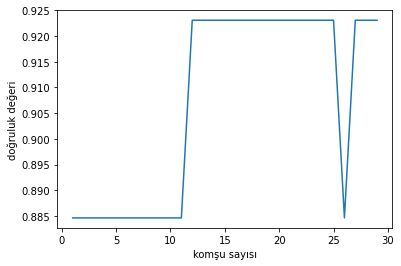

In [121]:
plt.plot(range(1,30),scoreliste)
plt.xlabel("komşu sayısı")
plt.ylabel("doğruluk değeri")
plt.show()

### Comment:  Values between 10 and 27 are the best values for me.